# A brief description of the project's objective
Instacart is a grocery delivery platform where customers can place a grocery order and have it delivered to them, similar to how Uber Eats and Door Dash work. This particular dataset was publicly released by Instacart in 2017 for a Kaggle competition.

Your mission is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

# An overview of the data you're working with
There are five tables in the dataset, and you’ll need to use all of them to do your data preprocessing and EDA. Below is a data dictionary that lists the columns in each table and describes that data that hold.

# Any expected outcomes or results you aim to achieve
My goal is to be able to clean up the data in order to answer questions assigned with this particular dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#instacart_orders.csv: each row corresponds to one order on the Instacart app
try:
    df_order = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

except FileNotFoundError:
    df_order = pd.read_csv('/datasets/instacart_orders.csv', sep=';')

In [3]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
#products.csv: each row corresponds to a unique product that customers can buy
try:
    df_products = pd.read_csv('/datasets/products.csv', sep=';')

except FileNotFoundError:
    df_products = pd.read_csv('/datasets/products.csv', sep=';')

In [5]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
#order_products.csv: each row corresponds to one item placed in an order
try:
    df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

except FileNotFoundError:
    df_order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [7]:
df_order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [8]:
# ID number that uniquely identifies each grocery aisle category
try:
    df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

except FileNotFoundError:
    df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')

In [9]:
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [10]:
#'department': name of the department
try:
    df_departments = pd.read_csv('/datasets/departments.csv', sep=';')

except FileNotFoundError:
    df_departments = pd.read_csv('/datasets/departments.csv', sep=';')

In [11]:
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


# Find and remove duplicate values (and describe why you make your choices)

# Orders data frame

In [12]:
# Check for duplicated orders
duplicates = df_order.duplicated()
duplicates.sum()

#15 duplcated orders

15

In [13]:
# Check for all orders placed Wednesday at 2:00 AM
# order_dow 2 signifies Wednesday
df_order[(df_order['order_dow'] == 2) & (df_order['order_hour_of_day'] == 2)]

#136 orders placed Weddnesday at 2:00 AM

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


In [14]:
# Remove duplicate orders
df_order = df_order.drop_duplicates().reset_index(drop=True)
df_order.head(20)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
5,1843871,20084,5,0,11,15.0
6,2511640,148233,40,3,8,2.0
7,2521283,97711,2,0,18,22.0
8,2266494,34954,40,5,15,4.0
9,446014,15356,2,4,8,10.0


In [15]:
# Double check for duplicate rows
duplicates = df_order.duplicated()
duplicates.sum()

0

In [16]:
# Double check for duplicate order IDs only
df_order.duplicated(subset=['order_id']).sum()

0

# Products Data Frame

In [17]:
# Check for fully duplicate rows
duplicates = df_products.duplicated()
duplicates.sum()

0

In [18]:
# Check for just duplicate product IDs
df_products['product_id'].duplicated().sum()

0

In [19]:
# Check for just duplicate product names (convert names to lowercase to compare better)
df_products['product_name'] = df_products['product_name'].str.lower()
df_products['product_name'].duplicated().sum()

#1361 duplicate product names

1361

In [20]:
# Check for duplicate product names that aren't missing
#Use the ~ symbol with isna() to filter df_products on condition 'product_name' column is not missing a value. 
df_products[~df_products['product_name'].isna()].duplicated().sum()

0

# Departments Data Frame

In [21]:
df_departments.duplicated().sum()

0

In [22]:
df_departments['department_id'].duplicated().sum() 

0

In [23]:
df_departments['department'].duplicated().sum() 

0

# Aisles Data Frame

In [24]:
df_aisles.duplicated().sum()

0

In [25]:
df_aisles['aisle_id'].duplicated().sum()

0

In [26]:
df_aisles['aisle'].duplicated().sum()

0

# Order Products Data Frame

In [27]:
# Check for fullly duplicate rows
duplicates = df_order_products.duplicated()
duplicates.sum()

0

In [28]:
# Double check for any other tricky duplicates
df_order_products['product_id'].duplicated().sum()

4499434

# Find and remove missing values


# Products Data Frame

In [29]:
# Are all of the missing product names associated with aisle ID 100?
df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] == 100)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [30]:
df_products[(df_products['product_name'].isna()) & (df_products['aisle_id'] != 100)]
#Yes, all of the missing product names are associated with aisle Id 100 as shown below

,product_id,product_name,aisle_id,department_id


In [31]:
# Are all of the missing product names associated with department ID 21?
df_products[(df_products['product_name'].isna()) & (df_products['department_id'] == 21)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [32]:
df_products[(df_products['product_name'].isna()) & (df_products['department_id'] != 21)]

#Yes, all of the missing product names are associated with department ID 21 as shown below

,product_id,product_name,aisle_id,department_id


In [33]:
# What is this ailse and department? - From the figure above we can see aisle_id = 100 and department_id = 21

In [34]:
df_products.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [35]:
# Fill missing product names with 'Unknown'
df_products['product_name'] = df_products['product_name'].fillna('Unknown')
df_products.isna().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

# Orders Data Frame

In [36]:
# Are there any missing values where it's not a customer's first order?
df_order.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [37]:
df_order.head(5)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [38]:
df_order[(df_order['days_since_prior_order'].isna()) & (df_order['order_number'] > 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


In [39]:
#There are no missing values in the days_since_prior_order column when it is not a customer's first order

# Order Products Data Frame

In [40]:
# What are the min and max values in this column?
print(df_order_products.min())
print(df_order_products.max())

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64
order_id             3421079.0
product_id             49694.0
add_to_cart_order         64.0
reordered                  1.0
dtype: float64


In [41]:
df_order_products.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [42]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
add_to_cart_order.value_counts()

61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
2652650     1
2729254     1
2621907     1
888470      1
1677118     1
Name: order_id, Length: 70, dtype: int64

In [43]:
# Do all orders with missing values have more than 64 products?
#No, they have less than 64 products

In [44]:
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999)

In [45]:
df_order_products.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [46]:
#Verify that the 'order_hour_of_day' are sensible i.e. 'order_hour_of_day' ranges from 0 to 23
print(df_order['order_hour_of_day'].min())
print(df_order['order_hour_of_day'].max())

0
23


In [47]:
# Verify that the 'order_dow' values in the orders tables are sensible ranges from 0 to 6
print(df_order['order_dow'].min())
print(df_order['order_dow'].max())

0
6


### [A2] What time of day do people shop for groceries?

In [48]:
df_order['order_hour_of_day'].value_counts()
#As shown below from the dataset, the time of day most people shop for groceries is 10 am

10    40578
11    40032
15    39789
14    39631
13    39007
16    38112
12    38034
9     35896
17    31930
18    25510
8     25024
19    19547
20    14624
7     13043
21    11019
22     8512
23     5611
6      4215
0      3180
1      1763
5      1371
2       989
3       770
4       765
Name: order_hour_of_day, dtype: int64

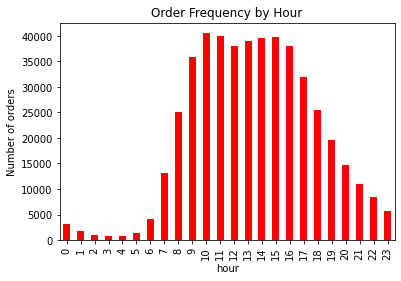

In [49]:
df_order['order_hour_of_day'].value_counts().sort_index().plot(kind='bar', color='red', xlabel='hour', ylabel='Number of orders', title='Order Frequency by Hour')
plt.show()

Most people create orders at 10 am. Furthermore, between 8 am and 6 pm, is the the time frame most orders
are made throughout a given day 

### [A3] What day of the week do people shop for groceries?

In [50]:
df_order['order_dow'].value_counts()
#Monday is the day most people shop for groceries 

0    84090
1    82185
2    65833
5    63488
6    62649
3    60897
4    59810
Name: order_dow, dtype: int64

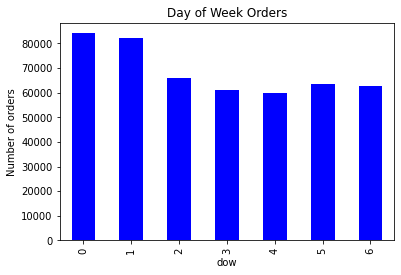

In [51]:
df_order['order_dow'].value_counts().sort_index().plot(kind='bar', color='blue', xlabel='dow', ylabel='Number of orders', title='Day of Week Orders')
plt.show()

Most people shop for grociers on Monday followed by Tuesday. 

### [A4] How long do people wait until placing another order?

In [52]:
df_order['days_since_prior_order'].value_counts()
#Most people wait 30 days

30.0    51337
7.0     44577
6.0     33930
4.0     31006
3.0     30224
5.0     30096
2.0     27138
8.0     25361
1.0     20179
9.0     16753
14.0    13992
10.0    13309
13.0    11737
11.0    11467
12.0    10658
0.0      9589
15.0     9416
16.0     6587
21.0     6448
17.0     5498
20.0     5302
18.0     4971
19.0     4939
22.0     4514
28.0     3745
23.0     3337
24.0     3015
27.0     2986
25.0     2711
29.0     2673
26.0     2640
Name: days_since_prior_order, dtype: int64

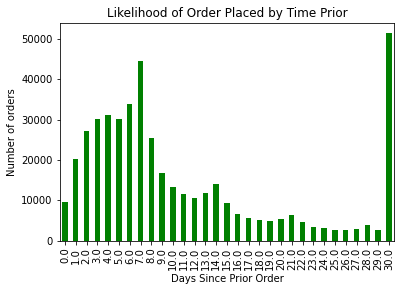

In [53]:
df_order['days_since_prior_order'].value_counts().sort_index().plot(kind='bar', color='green', xlabel='Days Since Prior Order', ylabel='Number of orders', title='Likelihood of Order Placed by Time Prior')
plt.show()

Most people wait 30 days before creating another order. However, 7 days is the next most frequent. 

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

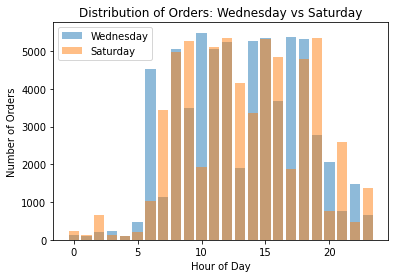

In [54]:
wed = df_order[df_order["order_dow"] == 2]['order_hour_of_day']
# Include an alpha value so we can fully see both histograms
sat = df_order[df_order["order_dow"] == 5]['order_hour_of_day']

wed = wed.reset_index(drop=True)
sat = sat.reset_index(drop=True)

plt.bar(wed.unique(), wed.value_counts(),  label='Wednesday', alpha=0.5)
plt.bar(sat.unique(), sat.value_counts(), label='Saturday', alpha=0.5)
plt.title('Distribution of Orders: Wednesday vs Saturday')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()

# Show the plot
plt.show()

There are a significant amount of orders placed on wednesday at 6 am compared to Saturday. 
Most orders for both days are placed at 12 pm. 

### [B2] What's the distribution for the number of orders per customer?

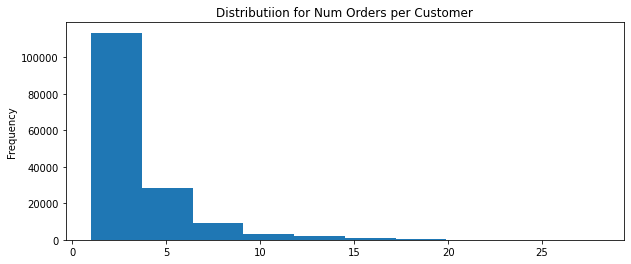

In [55]:
df_order.groupby('user_id')['order_id'].count().plot(kind='hist', figsize= (10,4), xlabel='Number of Orders', ylabel='Number of customers', title='Distributiion for Num Orders per Customer')
plt.show()

In [56]:
#Most customers place between 1 and 3 orders inclusive. After this, number of orders begin to decrease

### [B3] What are the top 20 popular products (display their id and name)?

In [57]:
#Store top 20 product_id into a variable
#By accessing the counts value and sorting in descending order we can easily find the top 20 items. 
#However, need to access the indices rather than the count value
top_20 = df_order_products['product_id'].value_counts().sort_values(ascending=False).head(20).index
top_20

Int64Index([24852, 13176, 21137, 21903, 47209, 47766, 47626, 16797, 26209,
            27845, 27966, 22935, 24964, 45007, 39275, 49683, 28204,  5876,
             8277, 40706],
           dtype='int64')

In [58]:
df_products[df_products['product_id'].isin(top_20)][['product_id', 'product_name']].reset_index(drop=True)

,product_id,product_name
0,5876,organic lemon
1,8277,apple honeycrisp organic
2,13176,bag of organic bananas
3,16797,strawberries
4,21137,organic strawberries
5,21903,organic baby spinach
6,22935,organic yellow onion
7,24852,banana
8,24964,organic garlic
9,26209,limes


# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [59]:
#Group order id and count unique products
items = df_order_products.groupby('order_id')['product_id'].count()
items.sort_values(ascending=False)

order_id
61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
2231165      1
816908       1
2230951      1
112056       1
3421079      1
Name: product_id, Length: 450046, dtype: int64

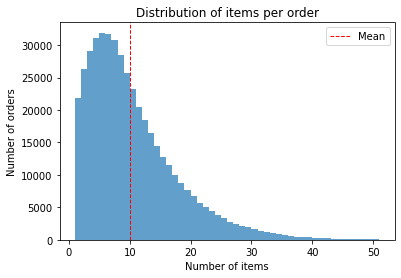

In [60]:
plt.hist(items, bins=range(1, 52), alpha=0.7)
plt.axvline(items.mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.legend()
plt.xlabel('Number of items')
plt.ylabel('Number of orders')
plt.title('Distribution of items per order')
plt.show()

In [61]:
#From the histogram we can see the average number of items is 10. The dotted red line within axvliine illustrates this. 
#Number of orders where items exceed 5 tend to decrease as more items are placed. 

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [62]:
reorder = df_order_products.groupby('product_id')['reordered'].count().sort_values(ascending=False).head(20)

In [63]:
df_products[df_products['product_id'].isin(reorder)][['product_id', 'product_name']]

,product_id,product_name
11780,11781,mushroom- spinach- and salsa tamales
11992,11993,sharp cheddar cheese slices
12231,12232,original diced tomatoes & green chilies
12543,12544,mezze penne pasta
13674,13675,pure tart cherry 100% juice
13878,13879,organic green tea with ginger
14583,14584,chewy chocolate made with reese's peanut butte...
15291,15292,made vitamin d3 1000 i.u
15897,15898,mango peach omega swirl omage-3 fish oil suppl...
19196,19197,show me the honey crunchy coconut chips


### [C5] What are the top 20 items that people put in their carts first? 

In [64]:
#Find first in cart orders
first = df_order_products[df_order_products['add_to_cart_order'] == 1]
#Find count of unique product ids, store count in new column, and sort by descending order. Store first 20 into new variable
one = first.groupby(['product_id']).size().reset_index(name='count').sort_values('count',ascending=False).head(20)
prod_id = one['product_id']
temp = df_products[df_products['product_id'].isin(prod_id)][['product_id', 'product_name']].sort_values(by='product_id', ascending=True)
temp

,product_id,product_name
195,196,soda
5784,5785,organic reduced fat 2% milk
12340,12341,hass avocados
13175,13176,bag of organic bananas
16796,16797,strawberries
19659,19660,spring water
21136,21137,organic strawberries
21902,21903,organic baby spinach
24851,24852,banana
26208,26209,limes


In [65]:
one.sort_values(by='product_id', ascending=True)

,product_id,count
115,196,1733
3153,5785,1310
6660,12341,1340
7127,13176,11026
9050,16797,2308
10622,19660,2336
11384,21137,3946
11786,21903,3336
13414,24852,15562
14158,26209,1370


In [66]:
merged = pd.merge(temp, one, on='product_id')
merged.sort_values('count', ascending=False)

,product_id,product_name,count
8,24852,banana,15562
3,13176,bag of organic bananas,11026
11,27845,organic whole milk,4363
6,21137,organic strawberries,3946
16,47209,organic hass avocado,3390
7,21903,organic baby spinach,3336
18,47766,organic avocado,3044
5,19660,spring water,2336
4,16797,strawberries,2308
12,27966,organic raspberries,2024
